In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import IPython
%matplotlib inline

In [2]:
img = cv2.imread('./testimages/test.png')
img.shape

(300, 300, 3)

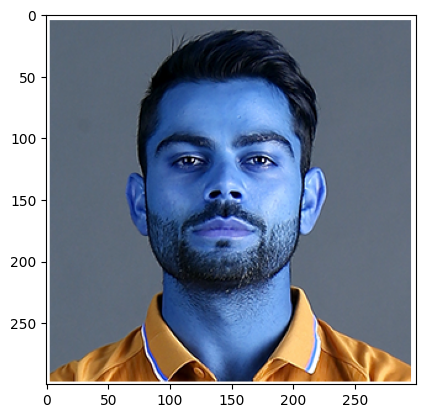

In [3]:
plt.imshow(img)


In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 300)

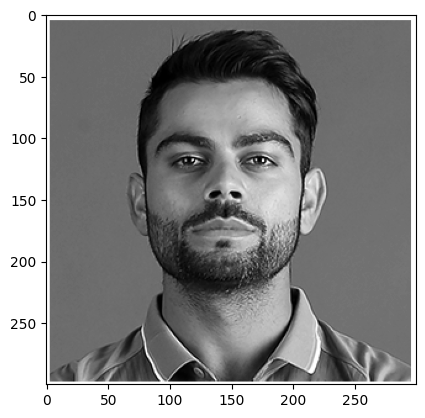

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 60,  52, 168, 168]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(60, 52, 168, 168)

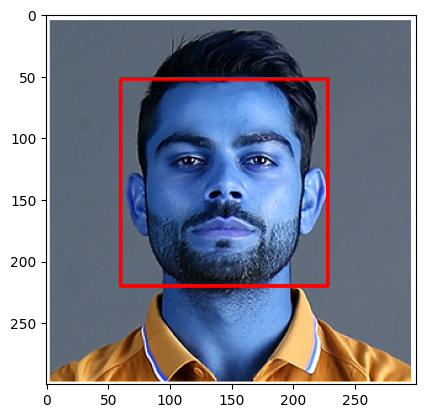

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(face_img)

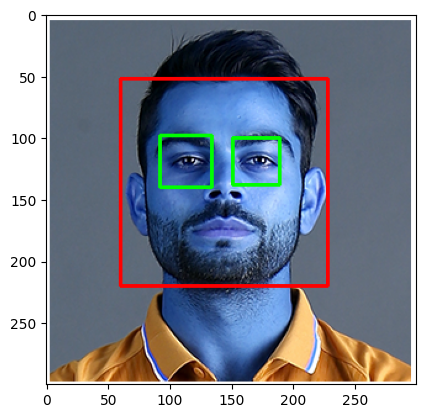

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


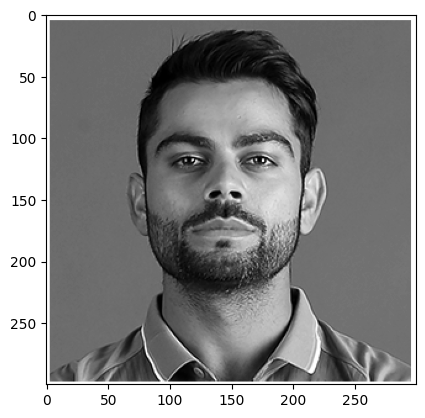

In [10]:
%matplotlib inline

plt.imshow(gray, cmap='gray')

In [11]:
cropped_img = np.array(roi_color)
cropped_img.shape

(168, 168, 3)

In [12]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

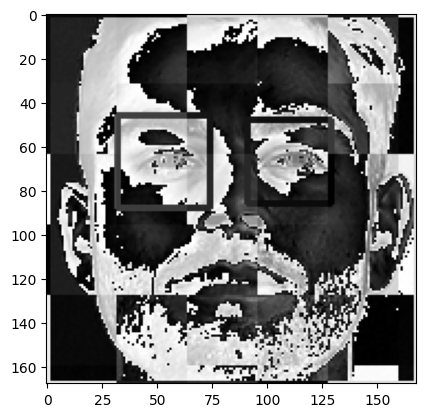

In [13]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color


In [1]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/virat kohli',
 './dataset/pvsindu 2',
 './dataset/pvsindu',
 './dataset/Messi',
 './dataset/cropped',
 './dataset/Jeremy Lin',
 './dataset/roger_federer']

In [218]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [219]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Generating cropped images in folder:  ./dataset/cropped/virat kohli


libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./dataset/cropped/maria_sharapova 2
Generating cropped images in folder:  ./dataset/cropped/stef curry
Generating cropped images in folder:  ./dataset/cropped/pvsindu
Generating cropped images in folder:  ./dataset/cropped/Messi


In [223]:
cropped_image_dirs

['./dataset/cropped/virat kohli',
 './dataset/cropped/maria_sharapova 2',
 './dataset/cropped/stef curry',
 './dataset/cropped/pvsindu',
 './dataset/cropped/Messi']

In [224]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'virat kohli': ['./dataset/cropped/virat kohli/virat kohli3.png',
  './dataset/cropped/virat kohli/virat kohli62.png',
  './dataset/cropped/virat kohli/virat kohli63.png',
  './dataset/cropped/virat kohli/virat kohli2.png',
  './dataset/cropped/virat kohli/virat kohli61.png',
  './dataset/cropped/virat kohli/virat kohli49.png',
  './dataset/cropped/virat kohli/virat kohli48.png',
  './dataset/cropped/virat kohli/virat kohli1.png',
  './dataset/cropped/virat kohli/virat kohli5.png',
  './dataset/cropped/virat kohli/virat kohli58.png',
  './dataset/cropped/virat kohli/virat kohli64.png',
  './dataset/cropped/virat kohli/virat kohli65.png',
  './dataset/cropped/virat kohli/virat kohli59.png',
  './dataset/cropped/virat kohli/virat kohli4.png',
  './dataset/cropped/virat kohli/virat kohli6.png',
  './dataset/cropped/virat kohli/virat kohli7.png',
  './dataset/cropped/virat kohli/virat kohli15.png',
  './dataset/cropped/virat kohli/virat kohli29.png',
  './dataset/cropped/virat kohli/virat

In [225]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'virat kohli': 0,
 'maria_sharapova 2': 1,
 'stef curry': 2,
 'pvsindu': 3,
 'Messi': 4}

In [226]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image) 
        try:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict[celebrity_name])
        except:
            break

In [227]:
len(X[0])

4096

In [230]:
X[0]

array([[199],
       [213],
       [225],
       ...,
       [242],
       [120],
       [ 73]], dtype=uint8)

In [231]:
y[0]

0

In [232]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(89, 4096)

In [233]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 100))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.8695652173913043

In [235]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.87        23
   macro avg       0.57      0.50      0.52        23
weighted avg       0.80      0.87      0.82        23



/Users/harsha/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harsha/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harsha/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 200))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8695652173913043

In [237]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [238]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [239]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/harsha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/harsha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/harsha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.819780,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.727473,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.578022,{'logisticregression__C': 1}


In [240]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [241]:
best_estimators['svm'].score(X_test,y_test)

0.8260869565217391

In [242]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7391304347826086

In [243]:
best_clf = best_estimators['svm']

In [244]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 1,  0,  0,  0,  0]])

In [246]:
class_dict

{'virat kohli': 0,
 'maria_sharapova 2': 1,
 'stef curry': 2,
 'pvsindu': 3,
 'Messi': 4}

In [247]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [248]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))